In [40]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68f30ff89c178033dab0ce0a70850eb9


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bandarbeyla
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | porto walter
Processing Record 11 of Set 1 | faya
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mbandaka
Processing Record 20 of Set 1 | tias
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping..

Processing Record 37 of Set 4 | gorey
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | juegang
Processing Record 40 of Set 4 | karaul
City not found. Skipping...
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | daru
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | ketchikan
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | tuy hoa
Processing Record 49 of Set 4 | antsohihy
Processing Record 50 of Set 4 | kindu
Processing Record 1 of Set 5 | bokspits
City not found. Skipping...
Processing Record 2 of Set 5 | horni jiretin
Processing Record 3 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | nanning
Processing Record 6 of Set 5 | librazhd
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | beringovskiy
Processing Recor

Processing Record 30 of Set 8 | rupert
Processing Record 31 of Set 8 | san nicolas
Processing Record 32 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 33 of Set 8 | caohai
Processing Record 34 of Set 8 | killybegs
Processing Record 35 of Set 8 | flin flon
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | gizo
Processing Record 38 of Set 8 | kidal
Processing Record 39 of Set 8 | mallow
Processing Record 40 of Set 8 | murgab
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | lolua
City not found. Skipping...
Processing Record 43 of Set 8 | kpandu
Processing Record 44 of Set 8 | krasnoselkup
Processing Record 45 of Set 8 | korsakov
Processing Record 46 of Set 8 | lorengau
Processing Record 47 of Set 8 | tateyama
Processing Record 48 of Set 8 | dhidhdhoo
Processing Record 49 of Set 8 | lasa
Processing Record 50 of Set 8 | isiro
Processing Record 1 of Set 9 | ciudad guayana
Processing Record 2 of Set 9 | broome
Processing R

Processing Record 17 of Set 12 | bull savanna
Processing Record 18 of Set 12 | henties bay
Processing Record 19 of Set 12 | keningau
Processing Record 20 of Set 12 | tazovskiy
Processing Record 21 of Set 12 | yinchuan
Processing Record 22 of Set 12 | sibu
Processing Record 23 of Set 12 | mbini
Processing Record 24 of Set 12 | kpalime
Processing Record 25 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 26 of Set 12 | maniitsoq
Processing Record 27 of Set 12 | danilovka
Processing Record 28 of Set 12 | vaitape
Processing Record 29 of Set 12 | jumla
Processing Record 30 of Set 12 | cabatuan
Processing Record 31 of Set 12 | atambua
Processing Record 32 of Set 12 | victor harbor
Processing Record 33 of Set 12 | starogard gdanski
Processing Record 34 of Set 12 | ciudad bolivar
Processing Record 35 of Set 12 | gainesville
Processing Record 36 of Set 12 | homa bay
Processing Record 37 of Set 12 | alcaniz
Processing Record 38 of Set 12 | ust-kuyga
Processing Record 39 of Set 1

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,39.99,87,0,2.24,RU,2021-03-28 23:01:15
1,Albany,42.6001,-73.9662,53.01,79,100,9.37,US,2021-03-28 23:00:50
2,Bandarbeyla,9.4942,50.8122,76.64,73,26,4.36,SO,2021-03-28 23:01:15
3,Tuktoyaktuk,69.4541,-133.0374,-13.00,77,90,13.80,CA,2021-03-28 23:01:16
4,Saint-Philippe,-21.3585,55.7679,77.00,78,0,8.05,RE,2021-03-28 23:01:16
5,Lagoa,39.0500,-27.9833,59.56,81,100,16.31,PT,2021-03-28 23:01:16
6,Mataura,-46.1927,168.8643,60.01,95,37,8.99,NZ,2021-03-28 23:01:17
7,Butaritari,3.0707,172.7902,81.50,76,84,14.16,KI,2021-03-28 23:01:17
8,Porto Walter,-8.2686,-72.7439,74.64,97,99,2.37,BR,2021-03-28 23:01:17
9,Faya,18.3851,42.4509,62.60,72,0,2.53,SA,2021-03-28 23:01:18


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-03-28 23:01:15,59.7035,30.7861,39.99,87,0,2.24
1,Albany,US,2021-03-28 23:00:50,42.6001,-73.9662,53.01,79,100,9.37
2,Bandarbeyla,SO,2021-03-28 23:01:15,9.4942,50.8122,76.64,73,26,4.36
3,Tuktoyaktuk,CA,2021-03-28 23:01:16,69.4541,-133.0374,-13.00,77,90,13.80
4,Saint-Philippe,RE,2021-03-28 23:01:16,-21.3585,55.7679,77.00,78,0,8.05
5,Lagoa,PT,2021-03-28 23:01:16,39.0500,-27.9833,59.56,81,100,16.31
6,Mataura,NZ,2021-03-28 23:01:17,-46.1927,168.8643,60.01,95,37,8.99
7,Butaritari,KI,2021-03-28 23:01:17,3.0707,172.7902,81.50,76,84,14.16
8,Porto Walter,BR,2021-03-28 23:01:17,-8.2686,-72.7439,74.64,97,99,2.37
9,Faya,SA,2021-03-28 23:01:18,18.3851,42.4509,62.60,72,0,2.53


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

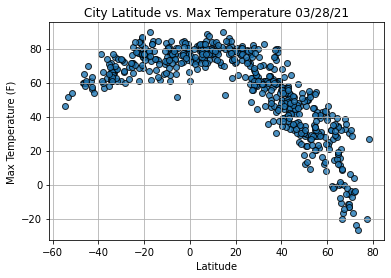

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

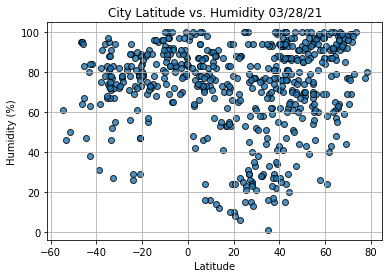

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

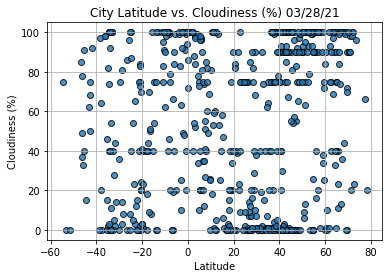

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

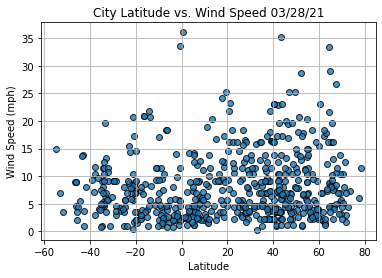

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title (title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

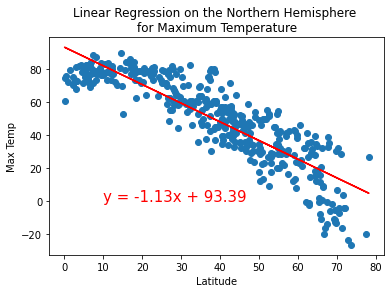

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,0))

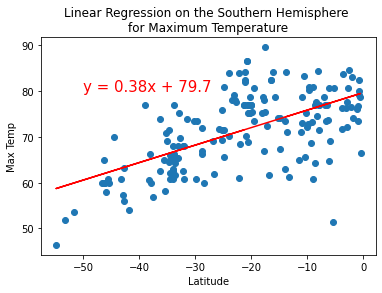

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

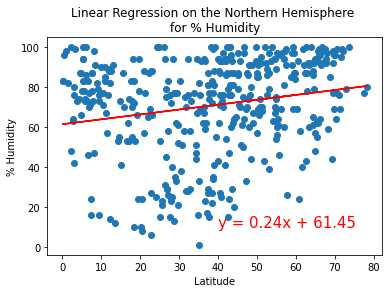

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

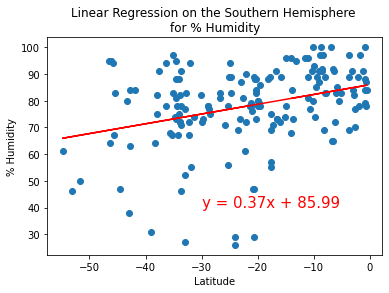

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-30,40))

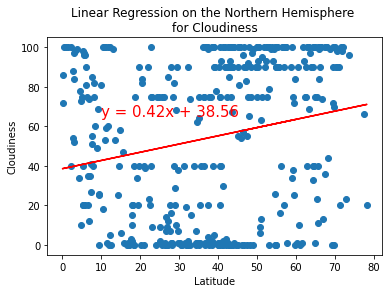

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness',(10,65))

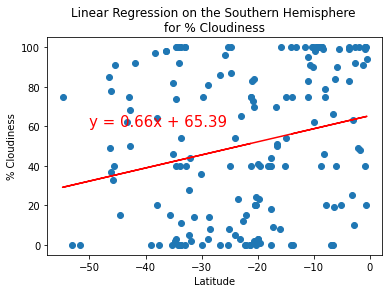

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

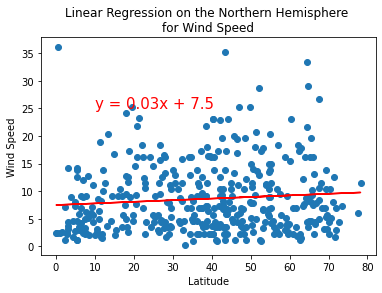

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,25))

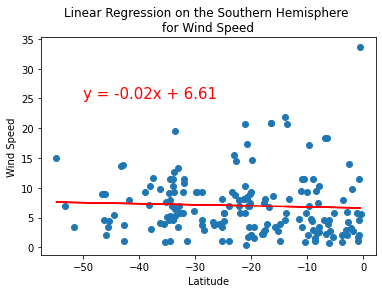

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))